In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("Data/fake reviews dataset.csv")

In [46]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [47]:
df.shape

(40432, 4)

In [48]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [49]:
# Clean up the category names
old_cat = ['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5']
new_cat = ['Home and Kitchen', 'Sports and Outdoors', 'Electronics',
        'Movies and TV', 'Tools and Home Improvement',
        'Pet Supplies', 'Kindle Store', 'Books', 'Toys and Games',
        'Clothing Shoes and Jewelry']
df['category'].replace(to_replace=old_cat, value=new_cat, inplace=True)

In [50]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [51]:
# Remove any duplicate rows, then check for NA values for each column
df = df.drop_duplicates(subset='text_')
print(df.isnull().sum())

category    0
rating      0
label       0
text_       0
dtype: int64


In [52]:
# Rename columns so that they are more descriptive
colnames_dict = {"label": "type", "text_": "comments"}
df.rename(columns=colnames_dict, inplace=True)

df.head()

,category,rating,type,comments
0,Home and Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home and Kitchen,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home and Kitchen,5.0,CG,This pillow saved my back. I love the look and...
3,Home and Kitchen,1.0,CG,"Missing information on how to use it, but it i..."
4,Home and Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...


In [53]:
# Distribution of Type column
df['type'].value_counts()

OR    20215
CG    20197
Name: type, dtype: int64

In [54]:
# Distribution of Category column
df['category'].value_counts()

Kindle Store                  4727
Books                         4369
Pet Supplies                  4251
Home and Kitchen              4055
Electronics                   3988
Sports and Outdoors           3943
Tools and Home Improvement    3858
Clothing Shoes and Jewelry    3845
Toys and Games                3791
Movies and TV                 3585
Name: category, dtype: int64

In [55]:
# Map the type column to numeric/boolean values:
  # OR (Original reviews, presumably human-created and authentic) = 0
  # CG (Computer-generated fake reviews) = 1

type_dict_map = {'OR': 0 ,'CG':1}
df['type'] = df['type'].map(type_dict_map)

In [58]:
df_dummies = pd.get_dummies(df['category'])

df = pd.concat([df, df_dummies], axis=1)
print(df.columns)

Index(['category', 'rating', 'type', 'comments', 'Books',
       'Clothing Shoes and Jewelry', 'Electronics', 'Home and Kitchen',
       'Kindle Store', 'Movies and TV', 'Pet Supplies', 'Sports and Outdoors',
       'Tools and Home Improvement', 'Toys and Games', 'Books',
       'Clothing Shoes and Jewelry', 'Electronics', 'Home and Kitchen',
       'Kindle Store', 'Movies and TV', 'Pet Supplies', 'Sports and Outdoors',
       'Tools and Home Improvement', 'Toys and Games'],
      dtype='object')


In [59]:
df.head()

,category,rating,type,comments,Books,Clothing Shoes and Jewelry,Electronics,Home and Kitchen,Kindle Store,Movies and TV,...,Books,Clothing Shoes and Jewelry,Electronics,Home and Kitchen,Kindle Store,Movies and TV,Pet Supplies,Sports and Outdoors,Tools and Home Improvement,Toys and Games
0,Home and Kitchen,5.0,1,"Love this! Well made, sturdy, and very comfor...",0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Home and Kitchen,5.0,1,"love it, a great upgrade from the original. I...",0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Home and Kitchen,5.0,1,This pillow saved my back. I love the look and...,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Home and Kitchen,1.0,1,"Missing information on how to use it, but it i...",0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Home and Kitchen,5.0,1,Very nice set. Good quality. We have had the s...,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Sample
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]
x_vectorizer = TfidfVectorizer()
x_transformed = x_vectorizer.fit_transform(corpus)
print(x_vectorizer.vocabulary_)


{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [25]:
all_feature_names = x_vectorizer.get_feature_names_out()
index = x_vectorizer.vocabulary_.get('thor') # Get index of the word 'thor'
print(index) 
x_vectorizer.idf_[index] # Get IDF score for the word 'thor'

25


2.386294361119891

In [26]:
for word in all_feature_names:
    index = x_vectorizer.vocabulary_.get(word)
    print(f"Word: {word}, IDF: {x_vectorizer.idf_[index]}")

Word: already, IDF: 2.386294361119891
Word: am, IDF: 2.386294361119891
Word: amazon, IDF: 2.386294361119891
Word: and, IDF: 2.386294361119891
Word: announcing, IDF: 1.2876820724517808
Word: apple, IDF: 2.386294361119891
Word: are, IDF: 2.386294361119891
Word: ate, IDF: 2.386294361119891
Word: biryani, IDF: 2.386294361119891
Word: dot, IDF: 2.386294361119891
Word: eating, IDF: 1.9808292530117262
Word: eco, IDF: 2.386294361119891
Word: google, IDF: 2.386294361119891
Word: grapes, IDF: 2.386294361119891
Word: iphone, IDF: 2.386294361119891
Word: ironman, IDF: 2.386294361119891
Word: is, IDF: 1.1335313926245225
Word: loki, IDF: 2.386294361119891
Word: microsoft, IDF: 2.386294361119891
Word: model, IDF: 2.386294361119891
Word: new, IDF: 1.2876820724517808
Word: pixel, IDF: 2.386294361119891
Word: pizza, IDF: 2.386294361119891
Word: surface, IDF: 2.386294361119891
Word: tesla, IDF: 2.386294361119891
Word: thor, IDF: 2.386294361119891
Word: tomorrow, IDF: 1.2876820724517808
Word: you, IDF: 2.

In [28]:
x_transformed.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

In [ ]:
# Raina Update

## Transform the data into a matrix of TF-IDF features
vectorizer2 = TfidfVectorizer(max_features=5000)
x_transformed_output = vectorizer2.fit_transform(df['comments'])

## Print the transformed output (output => 'feature name': index)
print(vectorizer2.vocabulary_)

In [39]:
#Chris Update
vectorizer = TfidfVectorizer(max_features=5000)
response = vectorizer.fit_transform(df['comments'])
print(len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)
print(response)

5000
{'love': 2651, 'this': 4458, 'well': 4844, 'made': 2676, 'sturdy': 4256, 'and': 225, 'very': 4734, 'comfortable': 910, 'it': 2350, 'pretty': 3368, 'great': 1966, 'upgrade': 4681, 'from': 1831, 'the': 4429, 'original': 3071, 've': 4722, 'had': 2008, 'mine': 2807, 'for': 1788, 'couple': 1049, 'of': 3019, 'years': 4972, 'pillow': 3231, 'saved': 3766, 'my': 2894, 'back': 361, 'look': 2633, 'feel': 1665, 'missing': 2819, 'information': 2276, 'on': 3039, 'how': 2190, 'to': 4513, 'use': 4697, 'but': 645, 'is': 2344, 'product': 3396, 'price': 3372, 'nice': 2955, 'set': 3870, 'good': 1932, 'quality': 3470, 'we': 4822, 'have': 2059, 'two': 4632, 'months': 2850, 'now': 2993, 'not': 2981, 'been': 440, 'wanted': 4788, 'different': 1259, 'flavors': 1738, 'they': 4445, 'are': 287, 'perfect': 3186, 'touch': 4546, 'me': 2746, 'only': 3044, 'thing': 4451, 'wish': 4897, 'little': 2609, 'more': 2854, 'space': 4095, 'these': 4444, 'done': 1329, 'fit': 1718, 'edges': 1434, 'extra': 1594, 'big': 480, 'n

In [31]:
target_var  = 'type'
feature_var = ['category', 'rating', 'comments'] 

X = df[feature_var]
Y = df[target_var]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=101)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28288, 3)
(12124, 3)
(28288,)
(12124,)


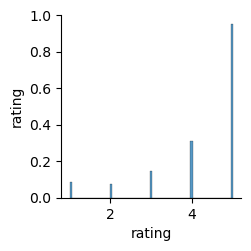

In [33]:
feature_var = ['category', 'rating']
sns.pairplot(df[feature_var])